假设有如下数据集代表$y=(0,1)$两类不同数据
![](./data/image/data1.png '输入数据')

以$P(\widehat{y}=1|x,w)$来表示$\widehat{y}=1$的概率,而由于y的取值为0或1，有$P(\widehat{y}=1|x,w) + P(\widehat{y}=0|x,w) = 1$，Logistic regression方法用线性方程加Sigmoid函数限制($0 \leq P \leq 1$)的方式建立模型:

$$\mathit{h_w(x) = g(z)}$$

$$\mathit{g(z) = \frac{1}{1 + e^{-z}}}$$

$$\mathit{z = w^Tx}$$

然后使用阈值(threshold)来判断具体分类结果:

$$\mathit{y} = \begin{cases} 0 \qquad h_w(x) < threshold \\ 1 \qquad h_w(x) \geq threshold  \end{cases}\\ $$

计算损失函数如下：

$$\mathit{ loss = 、frac{1}{m}\sum_{i = 1}^m \frac{1}{2}(h_w(x^{(i)} - y^{(i)}))^2 }$$

$$\mathit{Cost(h_w(x),y) = \frac{1}{2}(h_w(x) - y)^2}$$

但是显然由于Sigmoid函数的影响损失函数是“非凸”的，所以需要通过变形来得到一个合适的形式：

$$\mathit{Cost(h_w(x),y)} = \begin{cases} -log(h_w(x)) \qquad y = 1 \\ -log(1 - h_w(x)) \qquad y = 0 \end{cases}\\ $$

分析Cost函数：
* 当$y=1,h_w(x)=1$时$Cost=0$,即$P(y=1|w,x)=1$时预测$y=1$的准确度极高。
* 当$y=1,h_w(x)=0$时$Cost \to \infty$,即$P(y=1|w,x)=0$时预测$y=1$的准确度极低。
* 当$y=0$时的情况相同。

所以使用如下Cost形式：

$$Cost(h_w(x),y) = -ylog(h_w(x)) - (1-y)log(1 - h_w(x))$$

需要求解的优化问题为：

$$min loss(w) = \frac{1}{m} \sum_{(i=1)}{m} Cost(h_w(x), y)$$

$$\frac{d}{dw_j}(Cost(w)) = -y\frac{1}{h_w(x)}h_w(x)(1-h_w(x))x_j - (1-y)\frac{-h_w(x)}{1-h_w(x)} (1-h_w(x))x_j$$

$$= (h_w(x) - y)x_j$$

$$\frac{d}{dw_j}(loss(w)) = \frac{1}{m} \sum_{i=1}^{m} (h_w(x^{(i)}) - y^{(i)})x^{(i)}_j$$


In [1]:
import sys
import os

sys.path.append("%s\\.." % os.getcwd())

import numpy as np
from arsenal.data_process.load_data import DataLoader
from arsenal.data_process.plot_data import Ploter
from arsenal.optimizer.grad_descent import GradDescent
from arsenal.model.lgr import LogisticRegression

In [2]:
def plot_data(X, y):
    ploter = Ploter()
    
    pos = [i for i in range(y.shape[0]) if (y == 1)[i] == True]
    neg = [i for i in range(y.shape[0]) if (y == 0)[i] == True]
    
    ploter.plot(X[pos,0], X[pos,1], 'k+', linewidth=2, markersize=7)
    ploter.plot(X[neg,0], X[neg,1], 'ko', linewidth=1, markersize=7, markerfacecolor='y')
    
    ploter.show()

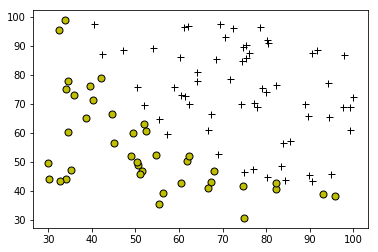

(0.69314718055994529, array([[ -0.1       ],
       [-12.00921659],
       [-11.26284221]]))
(0.21833019382659774, array([[ 0.04290299],
       [ 2.56623412],
       [ 2.64679737]]))
Iteration: 0, loss: 0.693147
Iteration: 2, loss: 0.659712
Iteration: 4, loss: 0.648862
Iteration: 6, loss: 0.643110
Iteration: 8, loss: 0.639525
Iteration: 10, loss: 0.637096
Iteration: 12, loss: 0.635364
Iteration: 14, loss: 0.634088
Iteration: 16, loss: 0.633126
Iteration: 18, loss: 0.632388
Iteration: 20, loss: 0.631816
Iteration: 22, loss: 0.631369
Iteration: 24, loss: 0.631015
Iteration: 26, loss: 0.630735
Iteration: 28, loss: 0.630512
Iteration: 30, loss: 0.630333
Iteration: 32, loss: 0.630189
Iteration: 34, loss: 0.630072
Iteration: 36, loss: 0.629978
Iteration: 38, loss: 0.629900
Iteration: 40, loss: 0.629837
Iteration: 42, loss: 0.629784
Iteration: 44, loss: 0.629740
Iteration: 46, loss: 0.629703
Iteration: 48, loss: 0.629672
Iteration: 50, loss: 0.629645
Iteration: 52, loss: 0.629621
Iteration: 5

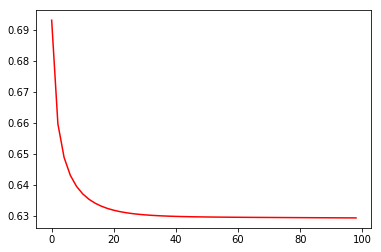

probability is  [ 0.62385683]
Train Accuracy:  60.0


In [4]:
if "__main__" == __name__:
    data = DataLoader().load('./data/data1.txt')
    X = data[:, 0:2]
    y = data[:, 2]
    if len(y.shape) == 1:
        y = y.reshape(y.shape[0], 1)
    plot_data(X, y)
    
    iterations = 100
    losses = []
    step = 2
    optimizer = GradDescent()
    learning_rate = 0.001
    
    X_ = np.c_[np.ones((X.shape[0], 1)), X]
    (m, n) = X_.shape
    w = np.zeros((n,1))
    
    test = LogisticRegression()
    print(test.lgr_loss_grad(X_, w, y))
    test_w = np.array(([-24.],[0.2],[0.2]))
    print(test.lgr_loss_grad(X_, test_w, y))
    
    for i in range(iterations):
        loss, grad = test.lgr_loss_grad(X_, w, y)
        w = optimizer.descent(grad, w, rate=learning_rate)
        
        if i % step == 0:
            losses.append(loss)
#             print("Iteration: %d, loss: %f" % (i, losses[-1]))
    
    index = np.arange(0,iterations, step).reshape(iterations//step, 1)
    losses = np.array((losses)).reshape(len(losses),1)
    ploter = Ploter()
    ploter.plot(index, np.array((losses)), 'r-')
    ploter.show()
    
    prob = test.lgr_func(np.array(([1,45,85])), w)
    print("probability is ", prob)
    
    predict = test.predict(X_, w)
    print("Train Accuracy: ", float(np.mean(predict == y)) * 100)
    